In [33]:
# en este programa implementaremos el análisis de componentes principales (PCA)
# y lo aplicarás a datos de audio digital

# lo haremos usando numpy con datos generados artificialmente
# y también lo haremos usando la librería sklearn

# comencemos definiendo algunos parametros generales de nuestros datos
N = 500      # número de ejemplos
D = 250       # número de carácterísticas
K = 2         # número de categorias distintas en nuestros datos

In [34]:
# ahora imporamos la libreria numpy y generamos nuestros datos
import numpy as np
X_0 = np.random.randn(int(N/2),D)           # los datos en la primer categoría son 
                                            # ejemplos de una distribución normal estándar
                                            # con valores entre -inf y +inf
X_1 = np.random.uniform(size=[int(N/2),D])  # los datos en la segunda categoría son 
                                            # ejemplos de una distribución uniforme
                                            # con valores entre 0 y 1

# para completar nuestros datos, ponemos todo en una sola matriz, 
# donde las primeras 500 ileras son los datos de la primer categoría
# y las siguientes 500 ileras son los datos de la segunda categoría
X = np.vstack([X_0,X_1])

In [35]:
# ahora llevamos a cabo el primer paso de PCA:
# estandarizar nuestros datos

# calculamos el vector u y centramos X
u = np.mean(X, axis=0, keepdims=True)
X_cent = X - u

# ahora calculamos sigma y normalizamos la varianza de X_cent
sigm = np.std(X_cent, axis=0, keepdims=True)
X_std = X_cent/sigm

In [42]:
# terminado el primer paso, podemos hacer el segundo:
# calcular la matriz de covarianza
C = (1/N)*np.dot(X_std.T,X_std)

In [43]:
# el tercer paso es calcular los autovalores y autovectores
# de la matriz de covarianza

# para esto vamos a usar las herramientas de algebra lineal en numpy
D, V = np.linalg.eig(C)

In [44]:
# finalmente, reducimos la dimensionalidad de nuestros datos

# en este ejercicio vamos a encontrar 2 componentes principales
# entonces encontramos la ubicación de los dos autovalores más altos
# en D. Aquí D es un vector que corresponde a la diagonal de la
# matriz de autovalores que discutimos en clase.
max_2_eig_idx = np.argsort(D)[-2:]

# definimos W con los dos autovectores más altos
W = V[:,np.flip(max_2_eig_idx)]

# proyectamos X_std sobre los dos autovectores más altos
X_PCA = np.dot(X_std,W)

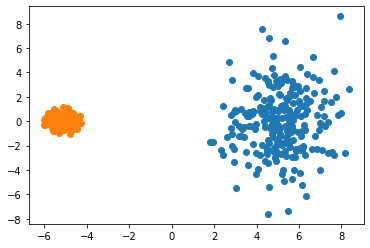

In [45]:
# ahora graficamos los resultados
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X_PCA[:250,0],X_PCA[:250,1])
plt.scatter(X_PCA[250:,0],X_PCA[250:,1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

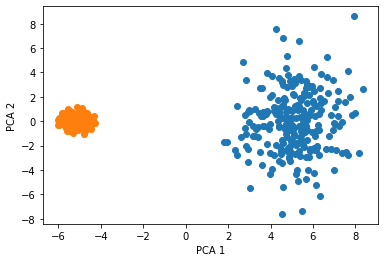

In [51]:
# python tiene una librería llamada sklearn que hace todos los pasos de
# PCA con funciones predeterminadas

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# primero usamos StandardScaler para estandarizar los datos
X_std = StandardScaler().fit_transform(X)

# después usamos PCA para crear el algoritmo
pca = PCA(n_components=2) # aquí se puede determinar otro número 
                          # de componentes principales si así se desea                          

# y lo aplicamos alos datos
X_PCA = pca.fit_transform(X_std)   

# graficamos para comprobar que todo se ve igual
plt.scatter(X_PCA[:250,0],X_PCA[:250,1])
plt.scatter(X_PCA[250:,0],X_PCA[250:,1])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()                               

In [ ]:
# Ahora tu harás lo mismo pero con una matriz que tiene grabaciones de audio
# esta celda va a cargar los datos que vas a usar. No cambies nada aquí. Solo
# corre la celda. El proceso de cargar los datos se va a tardar un tiempo. 
# Ten paciencia. Esta celda solo se debe correr una vez. 

# Después de correr esta celda, vas a tener una matriz 'x' de 577x16000
# donde cada ilera es una grabación (fs=16000) de un segundo de un 
# instrumento de cuerda (Violín, Viola o Cello). Solo se toca una nota
# en cada grabación. Las primeras 285 ileras de la matriz 'x' son notas
# que fueron tocadas con arco, y las siguientes 292 ileras con notas que fueron
# tocadas con pizzicato.

!rm -r data_zip
!rm -r data
!mkdir data_zip
!mkdir data
import urllib.request
url = 'http://theremin.music.uiowa.edu/sound%20files/MIS%20Pitches%20-%202014/Strings/'
instruments = ['Violin','Viola','Cello']
attacks = ['arco','pizz']
strings = {'Violin':['E','A','D','G'], 'Viola':['A','D','G','C'], 'Cello':['A','D','G','C']}

for instrument in instruments:
  print('Downloading ', instrument, ' files')
  for attack in attacks:
    for string in strings[instrument]:
      filename = instrument+'.'+attack+'.ff.sul'+string+'.stereo.zip'
      fullpath = url+instrument+'/'+filename
      response = urllib.request.urlretrieve(fullpath,'data_zip/'+filename)

!for file in data_zip/*.zip; do unzip "$file" -d data; done
!for file in data/*.aif; do ffmpeg -i "$file" "$file".wav; done
!rm data/*.aif 
!rm -r data/__MACOSX

import glob
import librosa    
x_arco = []
for filename in glob.glob('data/*arco*.wav'):
  data, fs = librosa.load(filename, sr=16000)  
  x_arco.append(data)

x_pizz = []
for filename in glob.glob('data/*pizz*.wav'):
  data, fs = librosa.load(filename, sr=16000)
  x_pizz.append(data)

import numpy as np
x = x_arco + x_pizz
max_len = 16000
for idata, data in enumerate(x):
  x[idata] = np.ndarray.tolist(data[:max_len]) + [0]*(max_len - len(data))

x = np.array(x)

In [ ]:
# tu tarea es generar una visualización 2D de los datos en esta matriz usando
# PCA. Lo debes hacer tanto 'a mano con numpy', como con sklearn, y tus 
# resultados deben ser similares con ambos métodos. 

# en tu visualización resultante, debe verse la separación (aunque no sea perfecta)
# entre datos que fueron tocados con arco y datos que fueron tocados con pizzicato

# Responde las preguntas: ¿Qué característica de tus datos crees 
# que es el primer componente principal? ¿Qué crees que sea el segundo?

# algunas pistas: 
# 1. aquí la matriz se llama 'x' porque está en el dominio del tiempo.
#     Considera obtener X calculando la magnitud del fft de x.
# 2. si calculas la magnitud del fft, recuerda que solo necesitas la mitad 
#     del espectro porque las frecuencias negativas y positivas son una
#     copia espejo unas de otras.
# 3. antes de llevar a cabo la estandarización de datos, recuerda que aquí estás
#     trabajando con grabaciones de audio. ¿Te puede beneficiar si normalizas 
#     las grabaciones de audio (en el dominio del tiempo) antes de hacer 
#     cualquier otra cosa?

# otras cosas que puedes hacer:
#     a) una visualización en 3D con tres componentes principales
#     b) extraer caracteristicas manualmente y hacer PCA en las caracteristicas
#        que hayas extraído.
#     c) alinear las grabaciones para que todas tengan el tiempo de ataque
#        en el mismo índice de la matriz 'x'
#     d) todo lo que se te ocurra para mejorar la separación de ataque arco 
#        y pizzicato.
#     e) reducir la tasa de muestreo (haciendo resampling) para que la 
#        dimensionalidad de 'x' sea más pequeña. PCA funciona mejor cuando el 
#        número de columnas es menor al número de ileras.